<h1>Performer une analyse bivariée en Python</h1>

<div style="text-align:justify;">Ce notebook regroupe les étapes pour faire une analyse bivariée quantitave jusqu'à la régression linéaire simple (moindre carré). Afin de vérifier les résultats, nous nous sommes appuyés sur le jeu de données fournis par le cours de sttaistiques R de MMe Alice Favre (G2M) et son cours de R.</div>

In [39]:
import pandas 
import numpy
import scipy 
import matplotlib.pyplot as plt 

In [4]:
filo = pandas.read_csv(".\\DONNEES\\BASE_TD_FILO_DISP_IRIS_2019.csv", sep=";", decimal=",", encoding="utf-8")
filo = filo[ ["IRIS", "DISP_MED19"] ] ## revenu médian disponible par IRIS

In [7]:
pop = pandas.read_csv(".\\DONNEES\\base-ic-evol-struct-pop-2019.CSV", sep=";", 
                      decimal=",", encoding="utf-8")

pop = pop[ ["IRIS", "P19_POP", "C19_POP15P_CS3"] ]

C:\Users\will\AppData\Local\Temp\ipykernel_11816\3255826225.py:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  pop = pandas.read_csv(".\\DONNEES\\base-ic-evol-struct-pop-2019.CSV", sep=";",


In [24]:
f = pandas.merge(left=filo, right=pop, left_on="IRIS", right_on="IRIS", how="right")
f.isna().sum()

IRIS                  0
DISP_MED19        47956
P19_POP               0
C19_POP15P_CS3        0
dtype: int64

In [25]:
f.dropna(axis=0, inplace=True)

In [27]:
f.shape

(1326, 4)

<h3>Inspection des données</h3>

<h3>Vérifier la normalité des variables</h3>

Text(0.5, 1.0, 'Distribution des revenus médians en 2019')

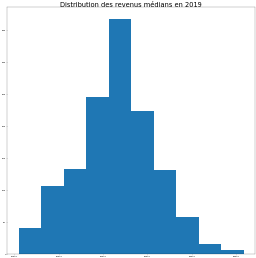

In [34]:
fig, ax = plt.subplots(figsize=(20,20), dpi=16)

plt.hist(x=f["DISP_MED19"])
plt.title("Distribution des revenus médians en 2019", fontsize=30)

Text(0.5, 1.0, 'Distribution des cadres en 2019')

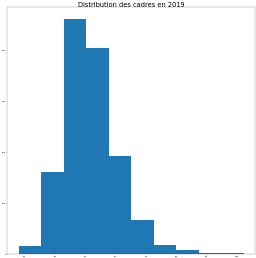

In [48]:
fig, ax = plt.subplots(figsize=(20,20), dpi=16)

f["C19_POP15P_CS3"] = f["C19_POP15P_CS3"].astype(float)
f["P19_POP"] = f["P19_POP"].astype(float)

plt.hist(x=numpy.sqrt(f["P19_POP"]))
plt.title("Distribution des cadres en 2019", fontsize=30)

<p>On peut dire que les valeurs sont quasiment normales dans les deux cas. On aurait pu faire le test de shapiro. Désormais, on veut savoir si le nombre de personnes dans la commune peut influence la présence de cadres dans la commune. Autrement dit, est-ce qu'il existe un lien entre taille de la population et la présence de CS03 ?</p>

<h3>Les variables ont-elles une relation linéaire ?</h3>

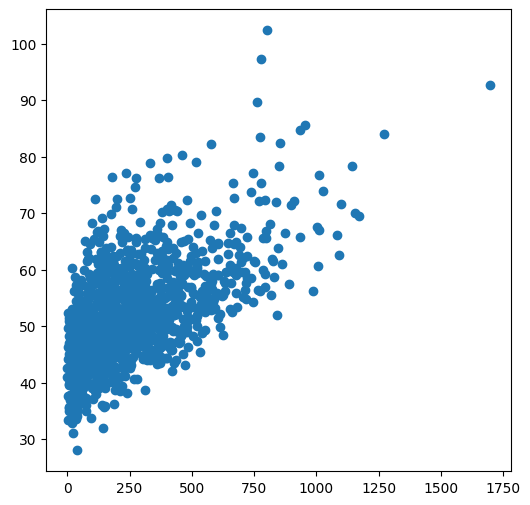

In [49]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(x=f["C19_POP15P_CS3"], y=numpy.sqrt(f["P19_POP"]))
plt.show()

<p>Selon le graphique ci-dessus, il semblerait qu'il existe un lien linéaire. Calculons le coefficient de corrélation de Pearson.</p>

<h3>Calculer le coefficient de corrélation R de Pearson</h3>

In [50]:
## calculer le r et sa p-value avec scipy :
r, p = scipy.stats.pearsonr(x=f["C19_POP15P_CS3"], y=numpy.sqrt(f["P19_POP"]))
print(r) ## coefficient de corrélation
print(p) ## p-value, mesure de la significativité de la variable

0.6054490162156955
1.920613450841002e-133


<p>La corréation est forte (0.61) et significative (1.92 * 10^-133). Le coefficient r est positif. On peut donc dire qu'il y a une relation positive</p>

<h2 style="border:2px solid red; padding:5px">Analyse de variance - ANOVA</h2>
<h2 style="border:2px solid red; padding:5px">Test du KHI2</h2>
<h2 style="border:2px solid red; padding:5px">Régression linéaire simple</h2>